In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv')

In [58]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [60]:
df['Category'] = df['Category'].map({'spam':1, 'ham':0})

In [61]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size = 0.2)

In [63]:
X_train.shape

(4457,)

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)

In [65]:
X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [66]:
X_train_cv.shape

(4457, 7741)

In [67]:
dir(cv)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_ngram_range',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'bui

In [68]:
cv.get_feature_names_out()[7448]

'wer'

In [69]:
cv.vocabulary_

{'lara': 4005,
 'said': 5863,
 'she': 6061,
 'can': 1617,
 'loan': 4152,
 'me': 4385,
 'lt': 4229,
 'gt': 3248,
 'okay': 4903,
 've': 7248,
 'seen': 5979,
 'it': 3741,
 'so': 6263,
 'should': 6109,
 'pick': 5194,
 'on': 4922,
 'friday': 2985,
 'oh': 4897,
 'only': 4933,
 'outside': 5012,
 'players': 5237,
 'allowed': 903,
 'to': 6915,
 'play': 5234,
 'know': 3947,
 'santa': 5884,
 'calling': 1605,
 'would': 7606,
 'your': 7706,
 'little': 4137,
 'ones': 4928,
 'like': 4099,
 'call': 1594,
 'from': 3004,
 'xmas': 7645,
 'eve': 2644,
 '09058094583': 171,
 'book': 1417,
 'time': 6884,
 'recpt': 5634,
 'you': 7701,
 'have': 3337,
 'ordered': 4973,
 'ringtone': 5778,
 'order': 4972,
 'is': 3729,
 'being': 1299,
 'processed': 5436,
 'quite': 5532,
 'late': 4014,
 'lar': 4004,
 'ard': 1035,
 '12': 267,
 'anyway': 990,
 'wun': 7634,
 'drivin': 2448,
 'want': 7360,
 'lick': 4084,
 'pussy': 5507,
 'now': 4824,
 'tired': 6891,
 'of': 4878,
 'arguing': 1045,
 'with': 7540,
 'about': 749,
 'this': 

In [70]:
X_train_np = X_train_cv.toarray()

In [71]:
X_train_np[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [72]:
np.where(X_train_np[0]!=0)

(array([1617, 3248, 4005, 4152, 4229, 4385, 5863, 6061]),)

In [73]:
from sklearn.naive_bayes import MultinomialNB

mb = MultinomialNB()

In [75]:
mb.fit(X_train_cv, y_train)

MultinomialNB()

In [76]:
X_test_cv = cv.transform(X_test)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = mb.predict(X_test_cv)

In [80]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.98      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [81]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

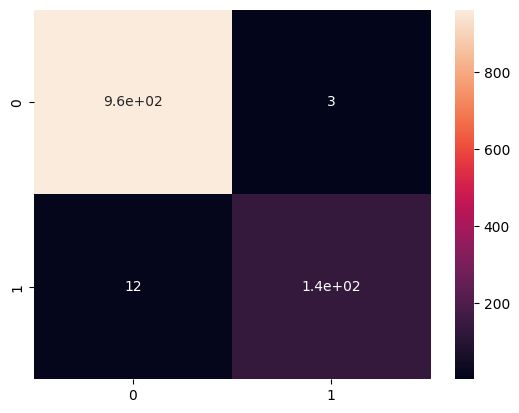

In [83]:
sns.heatmap(cm, annot = True)

In [87]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

In [88]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [89]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.98      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

